# PHYS323 Computational Assignment 3
###   Sarah Clapoff, V00886385  
##### Dec 6, 2022

![Alt text](prob-descript.png)

Note: In Python, matplotlib has the hist2d function, plotly has the density heatmap function,
seaborn has LOTS of options (e.g. kdeplot).

In [61]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import cmath

$ |nlm> = \psi(r, \theta,\phi) \\
\psi(r,\theta,\phi) = \sqrt{\frac{3}{5}} \psi_{200}(r,\theta,\phi) + e^{i\alpha} \sqrt{\frac{2}{5}} \psi_{210}(r,\theta,\phi) \\ $
Using the wave functions from MacIntyre Table 8.2 (p. 264). We are considering a hydrogen atom, so $Z=1$

$ \psi_{200}(r,\theta,\phi) = \frac{1}{\sqrt{\pi}} (1/2a_0)^{3/2} (1-\frac{r}{2a_0}) e^{\frac{-r}{2a_0}} \\
\psi_{210}(r,\theta,\phi) = \frac{1}{2\sqrt{\pi}} (1/2a_0)^{3/2} \frac{r}{a_0} e^{\frac{-r}{2a_0}} cos(\theta) \\
\psi(r,\theta,\phi) = \sqrt{\frac{1}{5\pi a_0^3}} e^{\frac{-r}{2a_0}} [\sqrt{3/8}(1-\frac{r}{2a_0}) + e^{i\alpha}\frac{r}{a_0}]\\$
($\theta=0$ since y=0)


In [78]:
#also taking a0 = 1
def psi2(x,z,alpha):
    r = np.sqrt(x**2 + z**2)
    psi200 = np.sqrt(3/5)*(1/np.sqrt(np.pi))*(1/2**(3/2))*(1-r/2)*np.exp(-r/2)
    psi210 = np.sqrt(2/5)*(1/(2*np.sqrt(np.pi)))*(1/2**(3/2))*z*np.exp(-r/2)*complex(np.cos(alpha),np.sin(alpha))
    psi = psi200 + psi210
    psi2 = psi.conjugate()*psi
    otherpsi = (np.exp(-r)/(40*np.pi))*((3*(1-r/2)**2) + np.sqrt(6)*(1-r)*z*np.cos(alpha) + r**2/2)
    return psi2.real

#psi2 = lambda x,z,alpha: (np.exp(-x)/5*np.pi)*(3*(1-x)**2/8 + np.sqrt(3/8)*(1-x/2)*x*2*np.cos(alpha) + x**2)

Alpha = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])*np.pi
x = np.linspace(-10,10,1000)
z = np.linspace(-10,10,1000)
X,Z = np.meshgrid(x,z)
p = psi2(X,Z,0)
p.shape, X.shape
#np.reshape(p, x.size)
p = p.real
#p[0][0], otherp[0][0]

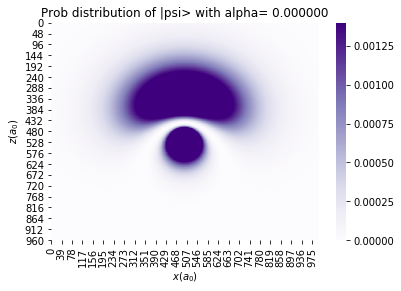

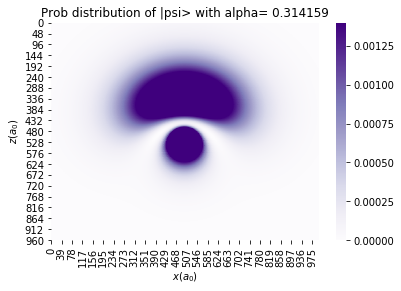

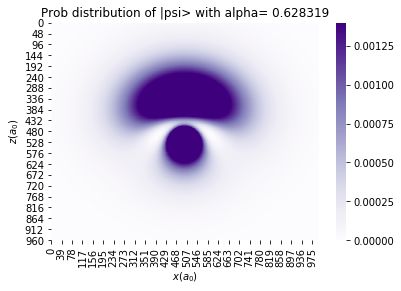

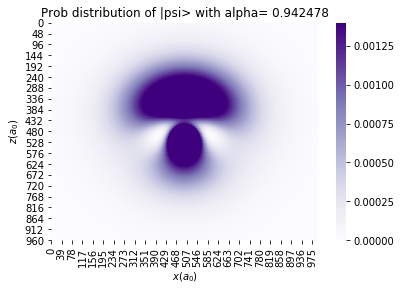

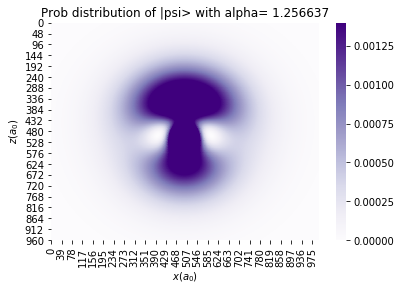

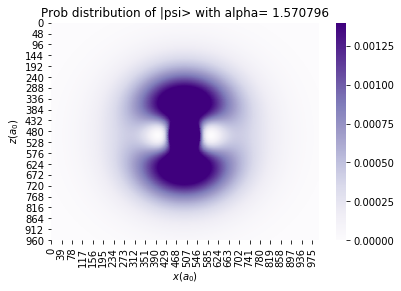

In [86]:
for a in Alpha:
    sns.heatmap(psi2(X,Z,a), vmin=0, vmax=0.0014, cmap=plt.cm.Purples)
    plt.xlabel('$x (a_0)$')
    plt.ylabel('$z (a_0)$')
    plt.title('Prob distribution of |psi> with alpha= %f' %a)
    plt.show()

b) The relative phase is making the |210> and |200> states out of phase, so that when we view them together at y=0, we don't see the superposition we expect when they are in phase. 